In [3]:
using Plots
using Printf

# Lambert's Problem
Figuring out the trajectory required to travel between two bodies orbiting the same point

In [4]:
AU = 1.495978707e11

μ = 1.32712440018e20 	# Standard gravitational parameter of the Sun
r_1 = AU				# Semi-major axis of the Earth
r_2 = 1.523691 * AU 		# Semi-major axis of MARS

2.279409292047537e11

In [5]:
# Chord length
c(θ) = sqrt(r_1^2 + r_2^2 - 2*r_1*r_2*cos(θ)) 
# Semiperimeter of triangle F P_1 P_2
s(θ) = (r_1+r_2+c(θ))/2	

θ_lim(a) = acos(-((4*a*AU-r_1-r_2)^2-r_1^2-r_2^2)/(2*r_1*r_2))
a_lim_min = (r_1+r_2+sqrt(r_1^2+r_2^2-2*r_1*r_2))/(4*AU)
a_lim_max = (r_1+r_2+sqrt(r_1^2+r_2^2+2*r_1*r_2))/(4*AU)

@printf("Min a=%.4f, max a=%.4f", a_lim_min, a_lim_max)

Min a=0.7618, max a=1.2618

## Elliptical Trajectories

In [6]:
# Because of floating points, sometimes the value is slightly |inner| > 1 so we bodge those away
function α_e(a, θ)
    inner = 1 - (s(θ) / (a * AU))
    if inner > 1
        inner = 1
    elseif inner < -1
        inner = -1
    end
    return acos(inner)
end

β_e(a, θ) = acos(1 - ((s(θ) - c(θ)) / (a * AU)))

# Period of the ellipse
P(a) = 2 * π * sqrt((a * AU)^3 / μ)

# if 0 < θ < 180
T_e(a, θ) = (P(a) / (2 * π)) * ((α_e(a, θ) - sin(α_e(a, θ)) - (β_e(a, θ) - sin(β_e(a, θ)))))
T_e_inv(a, θ) = P(a) - (P(a) / (2 * π)) * ((α_e(a, θ) - sin(α_e(a, θ)) + (β_e(a, θ) - sin(β_e(a, θ)))))

# if 180 < θ < 360
P_T_e(a, θ) = P(a) - T_e(a, θ)
P_T_e_inv(a, θ) = P(a) - T_e_inv(a, θ)

# The point at which the focus lies on the chord and there are only 2 solutions
# It is the minimum semi-major axis possbile for a transfer or the minimum energy transfer (not necessarily lowest ΔV)
Hohmann_point(θ) = (s(θ) / 2 / AU)

Hohmann_point (generic function with 1 method)

## Hyperbolic Trajectories

In [7]:
α_h(a, θ) = acosh(1 - (s(θ) / (a*AU)))
β_h(a, θ) = acosh(1 - ((s(θ) - c(θ)) / (a*AU)))

T_h(a, θ) = sqrt(-(a*AU)^3 / μ) * ((sinh(α_h(a, θ)) - α_h(a, θ) - (sinh(β_h(a, θ)) - β_h(a, θ))))
T_h_inv(a, θ) = sqrt(-(a*AU)^3 / μ) * (sinh(α_h(a, θ)) - α_h(a, θ)) + (sinh(β_h(a, θ)) - β_h(a, θ))

T_h_inv (generic function with 1 method)

## Parabolic Trajectories

In [8]:
T_p(θ) = 1 / 3 * sqrt(2 / μ)*(s(θ)^(3 / 2) - (s(θ) - c(θ))^(3 / 2))
T_inverse_p(θ) = 1 / 3 * sqrt(2 / μ)*(s(θ)^(3 / 2) + (s(θ) - c(θ))^(3 / 2))

T_inverse_p (generic function with 1 method)

## Plots

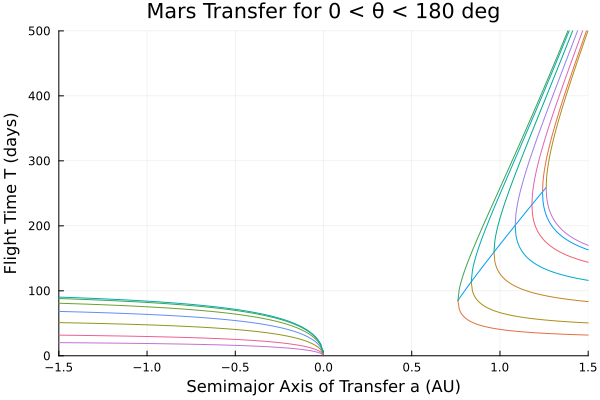

In [9]:
Fig = plot(legend=false)
title!(Fig, "Mars Transfer for 0 < θ < 180 deg")
xlims!(Fig, -1.5, 1.5)
ylims!(Fig, 0, 500)
xlabel!(Fig, "Semimajor Axis of Transfer a (AU)")
ylabel!(Fig, "Flight Time T (days)")

angles = range(0, deg2rad(179.9), length= 7)

angles_hohmann = range(0, deg2rad(179.9), length= 100)
x_hohmann = Hohmann_point.(angles_hohmann)
y_hohmann = T_e.(x_hohmann, angles_hohmann)/86400

plot!(Fig, x_hohmann, y_hohmann)

for i in angles
	x = range(Hohmann_point(i), 1.5, length=100)
	y = T_e.(x, i)/86400
	y_inv = T_e_inv.(x, i)/86400
	plot!(Fig, x, [y, y_inv], label ="$(@sprintf("%u", rad2deg(i))) deg")
	
	x_h = range(-1.5, -.001, length = 100)
	y_h= T_h.(x_h, i)/86400
	# y_h_inv= T_inverse_h.(x_h, i)/86400
	plot!(Fig, x_h, y_h, label ="$(@sprintf("%u", rad2deg(i))) deg")
end

display(Fig)

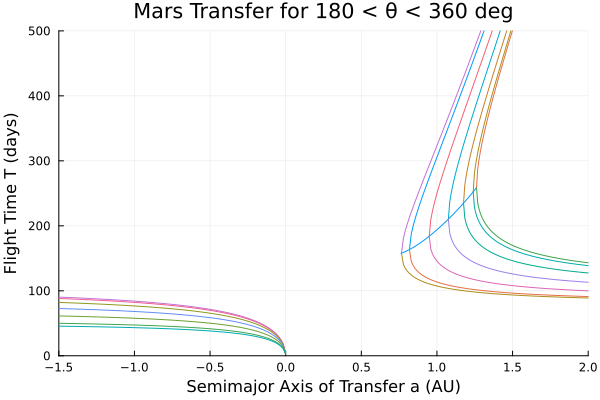

In [24]:
Fig = plot(legend=false)
title!(Fig, "Mars Transfer for 180 < θ < 360 deg")
xlims!(Fig, -1.5, 2)
ylims!(Fig, 0, 500)
xlabel!(Fig, "Semimajor Axis of Transfer a (AU)")
ylabel!(Fig, "Flight Time T (days)")

angles = range(deg2rad(180.1), deg2rad(365.9), length= 7)

angles_hohmann = range(deg2rad(180.1), deg2rad(365.9), length= 100)
x_hohmann = Hohmann_point.(angles_hohmann)
y_hohmann = P_T_e_inv.(x_hohmann, angles_hohmann)/86400

plot!(Fig, x_hohmann, y_hohmann)

for i in angles
	x = range(Hohmann_point(i), 2, length=100)
	y = P_T_e.(x, i)/86400
	y_inv = P_T_e_inv.(x, i)/86400
	plot!(Fig, x, [y, y_inv], label ="$(@sprintf("%u", rad2deg(i))) deg")
	
	x_h = range(-1.5, -.001, length = 100)
	y_h_inv= T_h_inv.(x_h, i)/86400
	plot!(Fig, x_h, y_h_inv, label ="$(@sprintf("%u", rad2deg(i))) deg")
end

display(Fig)

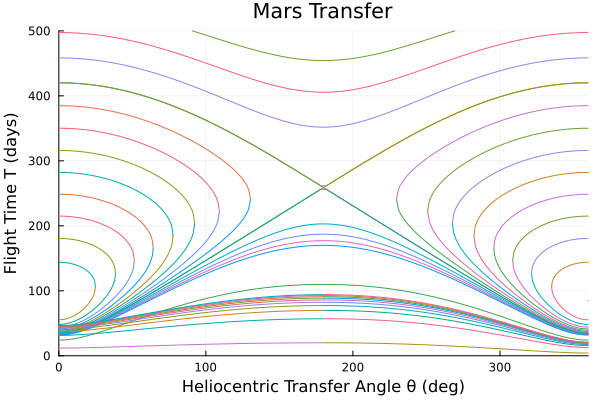

Elliiptical transfers with semi-major axes between 0.76 AU and 1.50 AU

In [11]:
# Fig = plot()
Fig = plot(legend=false)
title!(Fig, "Mars Transfer")
xlims!(Fig, 0, 360)
ylims!(Fig, 0, 500)
xlabel!(Fig, "Heliocentric Transfer Angle θ (deg)")
ylabel!(Fig, "Flight Time T (days)")

# angles_hohmann = range(0, 179.9, length=100)
# x_hohmann = Hohmann_point.(deg2rad.(angles_hohmann))
# y_hohmann = T_e.(x_hohmann, angles_hohmann) / 86400
# plot!(Fig, angles_hohmann, y_hohmann)

# Semimajor axes
as = range(a_lim_min, a_lim_max, length=10)

@printf("Elliiptical transfers with semi-major axes between %.2f AU and %.2f AU", a_lim_min, 1.5)

# Elliptical Transfers
for a in as
    θ = range(0, rad2deg(θ_lim(a)), length=100)
    y = T_e.(a, deg2rad.(θ)) / 86400
    y_inv = T_e_inv.(a, deg2rad.(θ)) / 86400
    plot!(Fig, θ, [y, y_inv], label="$(@sprintf("%.2f", a))")

    θ = range(rad2deg(2 * π - θ_lim(a)), 360, length=100)
    y = T_e.(a, deg2rad.(θ)) / 86400
    y_inv = T_e_inv.(a, deg2rad.(θ)) / 86400
    plot!(Fig, θ, [y, y_inv], label="$(@sprintf("%.2f", a))")
end

as = range(a_lim_max, 1.5, length=5)
for a in as
    θ = range(0, 360, length=100)
    y = T_e.(a, deg2rad.(θ)) / 86400
    y_inv = T_e_inv.(a, deg2rad.(θ)) / 86400
    plot!(Fig, θ, [y, y_inv], label="$(@sprintf("%.2f", a))")
end

θ = range(0, 360, length=100)
y_p = T_p.(deg2rad.(θ)) / 86400
plot!(Fig, θ, y_p, label="Parabolic")

# Hyperbolic Transfers
as = range(-0.02, -2, length=10)
for a in as
    θ = range(0, 179.9, length=100)
    y_h_inv = T_h_inv.(a, deg2rad.(θ)) / 86400
    plot!(Fig, θ, y_h_inv, label="$(@sprintf("%.2f", a))")

    θ = range(180.1, 360, length=100)
    y_h = T_h.(a, deg2rad.(θ)) / 86400
    plot!(Fig, θ, y_h, label="$(@sprintf("%.2f", a))")
end
display(Fig)

## Solution
We want to figure out the required transfer orbit for a given transfer time. It needs to be done this way round so we know that we'll hit the destination planet.

### Bisection
A numerical method for solving the equations that doesn't require knowing the derivative

In [12]:
function bisection(f, a_min, a_max)
    tol = 1e-5
    
    if sign(f(a_min)) == sign(f(a_max))
        error("function has the same sign at given endpoints")
    end

    mid = (a_min + a_max)/2

    while abs(f(mid)) > tol

        sign(f(mid)) == sign(f(a_min)) ? a_min=mid : a_max=mid
            
        mid = (a_min + a_max)/2

    end

    return mid
    
end

bisection (generic function with 1 method)

In [13]:
# Assuming we want an elliiptical 100 day transfer for a transfer angle of 90°

θ = deg2rad(100)

Δt(a) = T_e(a, θ)-200*86400

@printf("%.2f at min and %.2f at max", Δt(Hohmann_point(θ)), Δt(2))

bisection(Δt, Hohmann_point(θ), 2)

1094488.33 at min and -7695207.53 at max

1.1241534526941113

In [27]:
a_min = (r_1 + r_2) / 2
@printf("Minimum semimajor axis is probably %.2f", a_min/AU)

Minimum semimajor axis is probably 1.26

### ΔV

In [18]:
# Delta V for performing a singular manoeuvre with no plane change
ΔV(r_start, a_start, r_end, a_end) = abs(sqrt(μ) * (sqrt(2 / r_start - 1 / a_start) - sqrt(2 / r_end - 1 / a_end)))
# This equation is only valid for Hohmann Transfers
ΔV_transfer(a_transfer) = ΔV(r_1, r_1, r_1, a_transfer * AU) + ΔV(r_2, a_transfer * AU, r_2, r_2)

ΔV_transfer (generic function with 1 method)

# Constant Acceleration Transfer